# Session 2: 양자 회로 만들기와 텔레포테이션 (60분)

## 🎯 학습 목표
- 복잡한 양자 회로 설계
- 양자 텔레포테이션 이해
- 회로 최적화와 트랜스파일
- 실제 양자 컴퓨터 사용 준비


In [1]:
# 필요한 라이브러리
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_circuit_layout
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeKolkataV2
from qiskit import transpile
from qiskit.transpiler import CouplingMap
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

backend = FakeKolkataV2()
sampler = Sampler(backend)

print("Session 2 시작! 더 깊이 들어가봅시다! 🚀")

Session 2 시작! 더 깊이 들어가봅시다! 🚀


## Part 1: 회로 설계 기법

### 1.1 레지스터 사용하기

레지스터를 사용한 회로:


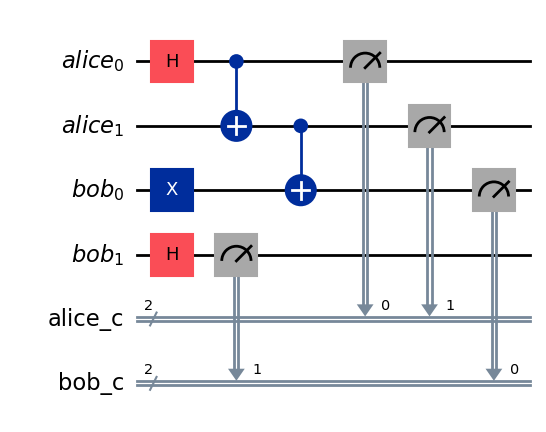

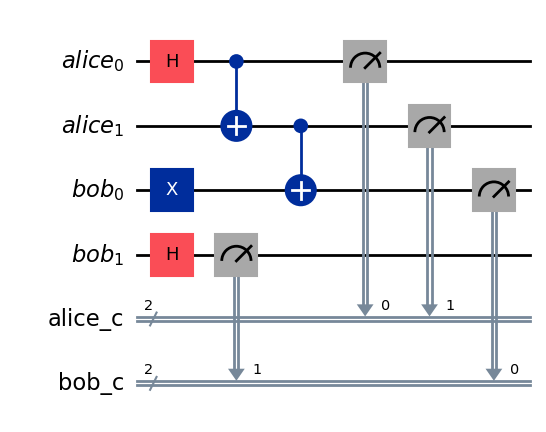

In [2]:
# 레지스터: 큐비트를 그룹으로 관리
# Alice가 2큐비트, Bob이 2큐비트를 가진 상황

alice = QuantumRegister(2, 'alice')
bob = QuantumRegister(2, 'bob')
alice_c = ClassicalRegister(2, 'alice_c')
bob_c = ClassicalRegister(2, 'bob_c')

# 회로 생성
qc = QuantumCircuit(alice, bob, alice_c, bob_c)

# Alice의 큐비트 준비
qc.h(alice[0])
qc.cx(alice[0], alice[1])

# Bob의 큐비트 준비
qc.x(bob[0])
qc.h(bob[1])

# Alice와 Bob 연결
qc.cx(alice[1], bob[0])

# 측정
qc.measure(alice, alice_c)
qc.measure(bob, bob_c)

print("레지스터를 사용한 회로:")
qc.draw('mpl')

### 1.2 Barrier와 회로 구조화

Barrier로 구조화된 회로:

Barrier는 최적화를 방지하고 회로를 읽기 쉽게 만듭니다!


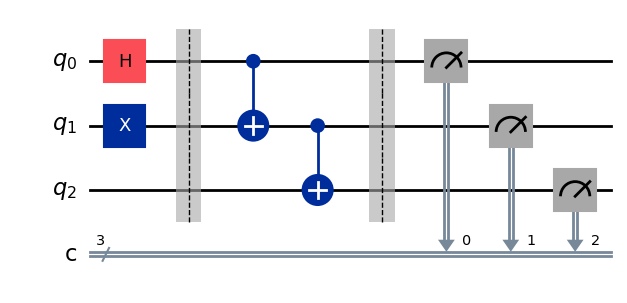

In [4]:
# Barrier: 회로를 논리적으로 구분
qc = QuantumCircuit(3, 3)

# Step 1: 초기화
qc.h(0)
qc.x(1)

qc.barrier()  # 구분선

# Step 2: 얽힘 생성
qc.cx(0, 1)
qc.cx(1, 2)

qc.barrier()

# Step 3: 측정
qc.measure([0, 1, 2], [0, 1, 2])

print("Barrier로 구조화된 회로:")
qc.draw('mpl')
print("\nBarrier는 최적화를 방지하고 회로를 읽기 쉽게 만듭니다!")

### 1.3 조건부 연산

조건부 연산 회로:

첫 번째 측정이 1이면 두 번째 큐비트를 반전합니다!


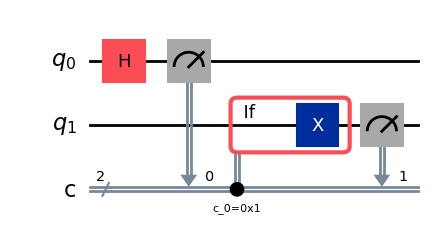

In [7]:
# 측정 결과에 따른 조건부 연산
qc = QuantumCircuit(2, 2)

# 첫 번째 큐비트 준비 및 측정
qc.h(0)
qc.measure(0, 0)

# 측정 결과가 1이면 두 번째 큐비트에 X 적용
with qc.if_test((qc.clbits[0], 1)):
    qc.x(1)

# 두 번째 큐비트 측정
qc.measure(1, 1)

print("조건부 연산 회로:")
qc.draw('mpl')
print("\n첫 번째 측정이 1이면 두 번째 큐비트를 반전합니다!")

## Part 2: 양자 텔레포테이션

### 2.1 텔레포테이션 이론

양자 텔레포테이션 프로토콜:
1. Alice와 Bob이 Bell pair 공유
2. Alice가 전송할 큐비트와 자신의 Bell pair 큐비트를 측정
3. 측정 결과를 Bob에게 전달 (고전 통신)
4. Bob이 측정 결과에 따라 자신의 큐비트 수정

결과: Alice의 큐비트 상태가 Bob에게 전송됨!


C:\Users\moctr\AppData\Local\Temp\ipykernel_1464\890444361.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


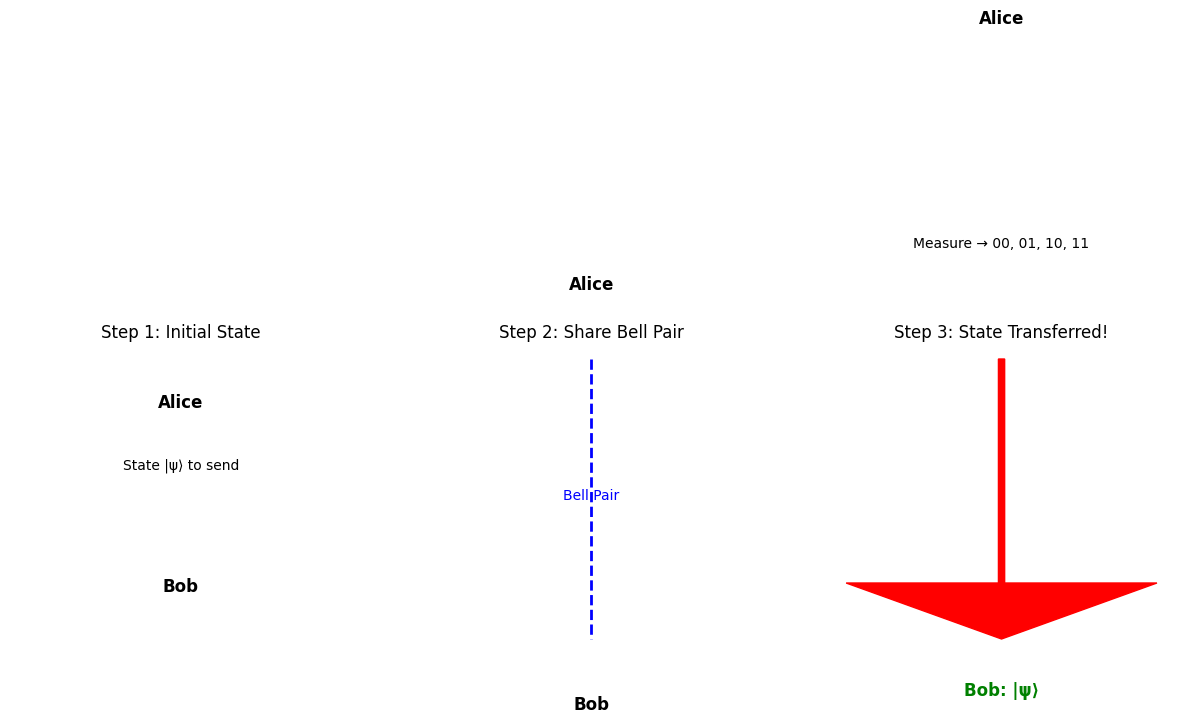

In [9]:
# 양자 텔레포테이션: 양자 상태를 전송!
print("양자 텔레포테이션 프로토콜:")
print("="*50)
print("1. Alice와 Bob이 Bell pair 공유")
print("2. Alice가 전송할 큐비트와 자신의 Bell pair 큐비트를 측정")
print("3. 측정 결과를 Bob에게 전달 (고전 통신)")
print("4. Bob이 측정 결과에 따라 자신의 큐비트 수정")
print("\n결과: Alice의 큐비트 상태가 Bob에게 전송됨!")

# 시각화
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# 초기 상태
ax1.text(0.5, 0.8, "Alice", ha='center', fontsize=12, fontweight='bold')
ax1.text(0.5, 0.6, "State |ψ⟩ to send", ha='center')
ax1.text(0.5, 0.2, "Bob", ha='center', fontsize=12, fontweight='bold')
ax1.set_title("Step 1: Initial State")
ax1.axis('off')

# Bell pair
ax2.text(0.5, 0.8, "Alice", ha='center', fontsize=12, fontweight='bold')
ax2.text(0.5, 0.5, "Bell Pair", ha='center', color='blue')
ax2.text(0.5, 0.2, "Bob", ha='center', fontsize=12, fontweight='bold')
ax2.plot([0.5, 0.5], [0.7, 0.3], 'b--', linewidth=2)
ax2.set_title("Step 2: Share Bell Pair")
ax2.axis('off')

# 텔레포테이션
ax3.text(0.5, 0.8, "Alice", ha='center', fontsize=12, fontweight='bold')
ax3.text(0.5, 0.6, "Measure → 00, 01, 10, 11", ha='center', fontsize=10)
ax3.arrow(0.5, 0.5, 0, -0.2, head_width=0.05, head_length=0.05, fc='red', ec='red')
ax3.text(0.5, 0.2, "Bob: |ψ⟩", ha='center', fontsize=12, fontweight='bold', color='green')
ax3.set_title("Step 3: State Transferred!")
ax3.axis('off')

plt.tight_layout()
plt.show()

### 2.2 텔레포테이션 구현

양자 텔레포테이션 회로:


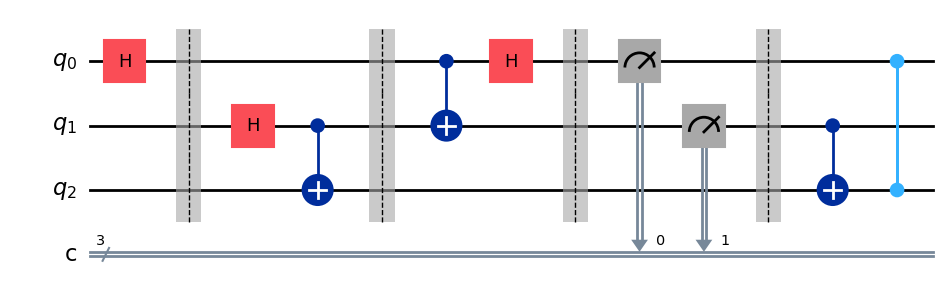

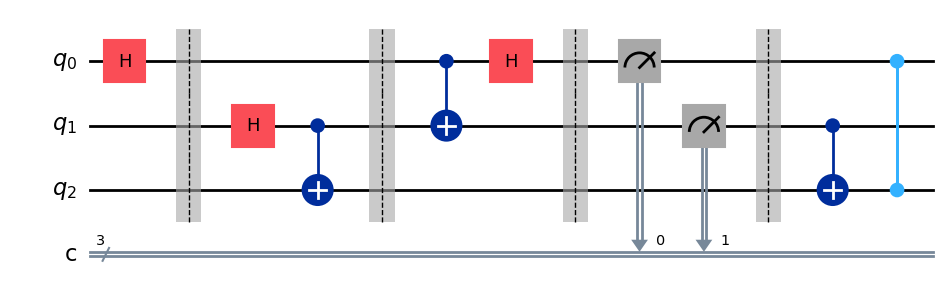

In [10]:
def quantum_teleportation():
    """양자 텔레포테이션 구현"""
    
    # 3개 큐비트: q0(전송할 상태), q1(Alice), q2(Bob)
    qc = QuantumCircuit(3, 3)
    
    # Step 1: 전송할 상태 준비 (예: |+⟩ 상태)
    qc.h(0)
    qc.barrier()
    
    # Step 2: Bell pair 생성 (q1과 q2)
    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()
    
    # Step 3: Alice의 Bell 측정
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    
    # Step 4: 측정
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.barrier()
    
    # Step 5: Bob의 수정 연산 (조건부)
    qc.cx(1, 2)  # if m1 = 1
    qc.cz(0, 2)  # if m0 = 1
    
    return qc

# 텔레포테이션 회로 생성
teleport = quantum_teleportation()
print("양자 텔레포테이션 회로:")
teleport.draw('mpl')

### 2.3 텔레포테이션 검증

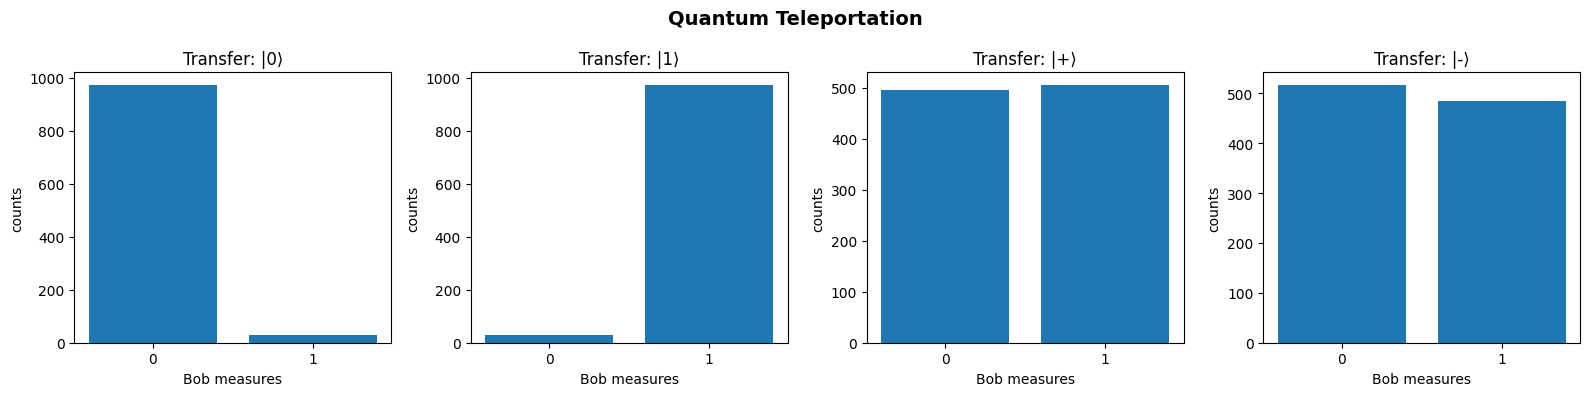

텔레포테이션 성공! 양자 상태가 전송되었습니다!


In [12]:
def test_teleportation(initial_state='plus'):
    """다양한 상태로 텔레포테이션 테스트"""
    
    # 전송할 상태와 검증용 회로
    original = QuantumCircuit(1)
    teleported = QuantumCircuit(3, 3)
    
    # 초기 상태 설정
    if initial_state == 'zero':
        pass  # |0⟩
    elif initial_state == 'one':
        original.x(0)  # |1⟩
        teleported.x(0)
    elif initial_state == 'plus':
        original.h(0)  # |+⟩
        teleported.h(0)
    elif initial_state == 'minus':
        original.h(0)  # |-⟩
        original.z(0)
        teleported.h(0)
        teleported.z(0)
    
    # 원본 상태
    original_state = Statevector(original)
    
    # 텔레포테이션
    teleported.barrier()
    teleported.h(1)
    teleported.cx(1, 2)
    teleported.barrier()
    teleported.cx(0, 1)
    teleported.h(0)
    teleported.measure(0, 0)
    teleported.measure(1, 1)
    teleported.barrier()
    teleported.cx(1, 2)
    teleported.cz(0, 2)
    teleported.measure(2, 2)
    
    return original_state, teleported

# 다양한 상태 테스트
states = ['zero', 'one', 'plus', 'minus']
symbols = ['|0⟩', '|1⟩', '|+⟩', '|-⟩']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, (state, symbol) in enumerate(zip(states, symbols)):
    original, circuit = test_teleportation(state)
    
    # 시뮬레이션
    transpiled = transpile(circuit, backend)
    job = sampler.run([(transpiled, [])], shots=1000)
    result = job.result()
    counts = result[0].data.c.get_counts()
    
    # Bob의 큐비트 (bit 2) 결과만 추출
    bob_results = {}
    for outcome, count in counts.items():
        outcome = int(outcome, 2)
        bob_bit = (outcome >> 2) & 1
        bob_results[bob_bit] = bob_results.get(bob_bit, 0) + count
    
    # 시각화
    axes[idx].bar(bob_results.keys(), bob_results.values())
    axes[idx].set_title(f'Transfer: {symbol}')
    axes[idx].set_xlabel('Bob measures')
    axes[idx].set_ylabel('counts')
    axes[idx].set_xticks([0, 1])

plt.suptitle('Quantum Teleportation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("텔레포테이션 성공! 양자 상태가 전송되었습니다!")

## Part 3: 트랜스파일과 최적화

### 3.1 트랜스파일이란?

트랜스파일이 필요한 이유:
1. 하드웨어 제약: 모든 큐비트가 연결되지 않음
2. 게이트 제약: 하드웨어가 지원하는 게이트만 사용
3. 노이즈 최소화: 게이트 수를 줄여 오류 감소

원본 회로:
게이트 수: 4
깊이: 4


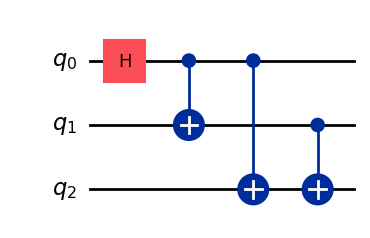

In [13]:
# 트랜스파일: 이상적인 회로를 실제 하드웨어용으로 변환
print("트랜스파일이 필요한 이유:")
print("="*50)
print("1. 하드웨어 제약: 모든 큐비트가 연결되지 않음")
print("2. 게이트 제약: 하드웨어가 지원하는 게이트만 사용")
print("3. 노이즈 최소화: 게이트 수를 줄여 오류 감소")

# 간단한 회로 생성
original = QuantumCircuit(3)
original.h(0)
original.cx(0, 1)
original.cx(0, 2)
original.cx(1, 2)

print("\n원본 회로:")
original.draw('mpl')
print(f"게이트 수: {original.size()}")
print(f"깊이: {original.depth()}")

### 3.2 최적화 레벨

In [ ]:
# 다양한 최적화 레벨로 트랜스파일
optimization_levels = [0, 1, 2, 3]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, level in enumerate(optimization_levels):
    # 트랜스파일
    transpiled = transpile(original, backend, optimization_level=level)
    
    # 정보 수집
    gate_count = transpiled.size()
    depth = transpiled.depth()
    
    # 시각화
    axes[idx].text(0.5, 0.9, f'최적화 레벨 {level}', 
                  ha='center', fontsize=12, fontweight='bold',
                  transform=axes[idx].transAxes)
    
    # 회로 정보
    info_text = f"""게이트 수: {gate_count}
깊이: {depth}

특징:
"""
    
    if level == 0:
        info_text += "• 최소 변환\n• 빠른 컴파일\n• 큰 회로"
    elif level == 1:
        info_text += "• 가벼운 최적화\n• 균형잡힌 선택\n• 기본값"
    elif level == 2:
        info_text += "• 중간 최적화\n• 노이즈 감소\n• 좋은 성능"
    else:
        info_text += "• 최대 최적화\n• 느린 컴파일\n• 최소 오류"
    
    axes[idx].text(0.5, 0.4, info_text, ha='center', va='center',
                  fontsize=10, transform=axes[idx].transAxes)
    axes[idx].axis('off')

plt.suptitle('트랜스파일 최적화 레벨 비교', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.3 하드웨어 토폴로지

In [ ]:
# 실제 하드웨어의 큐비트 연결 구조
from qiskit.visualization import plot_coupling_map

# 백엔드의 연결 구조 확인
coupling_map = backend.configuration().coupling_map

print(f"백엔드: {backend.name}")
print(f"큐비트 수: {backend.configuration().n_qubits}")
print(f"\n연결된 큐비트 쌍 (일부):")
for i, connection in enumerate(coupling_map[:10]):
    print(f"  {connection[0]} ↔ {connection[1]}")

# 복잡한 회로를 하드웨어에 맞게 변환
complex_circuit = QuantumCircuit(5)
complex_circuit.h(0)
for i in range(4):
    complex_circuit.cx(i, i+1)

print("\n원본 회로 (모든 큐비트 연결):")
print(complex_circuit.draw())

# 트랜스파일
transpiled = transpile(complex_circuit, backend, optimization_level=2)
print("\n트랜스파일된 회로 (하드웨어 제약 고려):")
print(f"게이트 수: {transpiled.size()}")
print(f"SWAP 게이트 추가됨!")

### 3.4 게이트 분해

In [ ]:
# 복잡한 게이트를 기본 게이트로 분해
from qiskit.circuit.library import TGate, SGate

# Toffoli 게이트 (3-큐비트 게이트)
toffoli_circuit = QuantumCircuit(3)
toffoli_circuit.ccx(0, 1, 2)  # Toffoli = Controlled-Controlled-X

print("원본 Toffoli 게이트:")
print(toffoli_circuit.draw())
print(f"게이트 수: {toffoli_circuit.size()}")

# 기본 게이트로 분해
decomposed = transpile(toffoli_circuit, basis_gates=['cx', 'u3'])

print("\n분해된 회로 (1-큐비트와 CNOT만 사용):")
print(f"게이트 수: {decomposed.size()}")
print("\nToffoli 하나가 많은 기본 게이트로 분해됩니다!")

# 게이트 종류별 카운트
gate_counts = decomposed.count_ops()
print("\n게이트 종류별 개수:")
for gate, count in gate_counts.items():
    print(f"  {gate}: {count}개")

## Part 4: 실습 프로젝트

### 4.1 양자 비밀 공유

In [ ]:
def quantum_secret_sharing():
    """3자간 양자 비밀 공유"""
    
    # Alice가 비밀을 Bob과 Charlie와 공유
    qc = QuantumCircuit(3, 3)
    
    # 비밀: |1⟩ 상태
    qc.x(0)
    
    # GHZ state로 공유
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    
    # 측정
    qc.measure([0, 1, 2], [0, 1, 2])
    
    return qc

# 실행
secret_sharing = quantum_secret_sharing()
print("양자 비밀 공유 회로:")
secret_sharing.draw('mpl')
plt.show()

# 시뮬레이션
transpiled = transpile(secret_sharing, backend)
job = sampler.run([(transpiled, [])], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts()

plot_histogram(counts)
plt.title("비밀 공유 결과: 모두 같은 값!")
plt.show()

print("모든 참가자가 같은 측정 결과를 얻습니다!")
print("하지만 개별적으로는 비밀을 알 수 없습니다.")

### 4.2 양자 오류 감지

In [ ]:
def quantum_error_detection():
    """간단한 오류 감지 코드"""
    
    # 3-큐비트 반복 코드
    qc = QuantumCircuit(3, 3)
    
    # 인코딩: |0⟩ → |000⟩
    # (아무것도 안 함)
    
    # 오류 시뮬레이션 (랜덤하게 하나의 큐비트에 X 적용)
    import random
    error_qubit = random.randint(0, 2)
    print(f"오류 발생: 큐비트 {error_qubit}")
    qc.x(error_qubit)
    
    # 측정
    qc.measure([0, 1, 2], [0, 1, 2])
    
    return qc, error_qubit

# 오류 감지 테스트
error_circuit, error_pos = quantum_error_detection()

# 실행
transpiled = transpile(error_circuit, backend)
job = sampler.run([(transpiled, [])], shots=1)
result = job.result()
counts = result[0].data.c.get_counts()

# 결과 분석
measurement = list(counts.keys())[0]
binary = format(measurement, '03b')

print(f"\n측정 결과: {binary}")

# 다수결로 원래 값 복원
zeros = binary.count('0')
ones = binary.count('1')

if zeros > ones:
    corrected = '0'
    print(f"원래 값: 0 (투표: {zeros} vs {ones})")
else:
    corrected = '1'
    print(f"원래 값: 1 (투표: {ones} vs {zeros})")

print("\n단일 오류를 감지하고 정정할 수 있습니다!")

### 4.3 양자 스왑 테스트

In [ ]:
def quantum_swap_test(state1='zero', state2='zero'):
    """두 양자 상태가 같은지 테스트"""
    
    # 3큐비트: 제어, 상태1, 상태2
    qc = QuantumCircuit(3, 1)
    
    # 상태 준비
    if state1 == 'one':
        qc.x(1)
    elif state1 == 'plus':
        qc.h(1)
    
    if state2 == 'one':
        qc.x(2)
    elif state2 == 'plus':
        qc.h(2)
    
    qc.barrier()
    
    # SWAP 테스트
    qc.h(0)
    qc.cswap(0, 1, 2)  # Controlled-SWAP
    qc.h(0)
    
    # 제어 큐비트만 측정
    qc.measure(0, 0)
    
    return qc

# 다양한 상태 쌍 테스트
test_pairs = [
    ('zero', 'zero', '같음'),
    ('zero', 'one', '다름'),
    ('plus', 'plus', '같음'),
    ('zero', 'plus', '부분적')
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, (s1, s2, expected) in enumerate(test_pairs):
    # SWAP 테스트
    swap_test = quantum_swap_test(s1, s2)
    
    # 실행
    transpiled = transpile(swap_test, backend)
    job = sampler.run([(transpiled, [])], shots=1000)
    result = job.result()
    counts = result[0].data.c.get_counts()
    
    # 시각화
    prob_0 = counts.get(0, 0) / 1000
    axes[idx].bar(['0', '1'], [counts.get(0, 0), counts.get(1, 0)])
    axes[idx].set_title(f'{s1} vs {s2}\n({expected})')
    axes[idx].set_ylabel('카운트')
    
    # 유사도 계산
    similarity = 2 * prob_0 - 1
    axes[idx].text(0.5, 0.9, f'유사도: {similarity:.2f}',
                  ha='center', transform=axes[idx].transAxes)

plt.suptitle('양자 SWAP 테스트: 상태 비교', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("측정 결과 0이 많을수록 두 상태가 유사합니다!")

## 📝 Session 2 요약

### 오늘 배운 것:
1. **회로 설계**: 레지스터, Barrier, 조건부 연산
2. **양자 텔레포테이션**: 양자 상태 전송
3. **트랜스파일**: 이상적 회로 → 실제 하드웨어
4. **최적화**: 게이트 수 감소, 오류 최소화

### 핵심 개념:
- **텔레포테이션 ≠ 복사**: No-Cloning 정리
- **하드웨어 제약**: 모든 큐비트가 연결되지 않음
- **최적화 트레이드오프**: 컴파일 시간 vs 회로 품질

### 실습 프로젝트:
- 양자 비밀 공유
- 오류 감지
- SWAP 테스트

In [ ]:
print("🎊 Session 2 완료!")
print("\n당신의 성취:")
print("✅ 복잡한 양자 회로 설계")
print("✅ 양자 텔레포테이션 구현")
print("✅ 회로 최적화 이해")
print("✅ 실제 하드웨어 제약 이해")
print("\n다음: Session 3 - 양자 알고리즘 입문! 🚀")